In [12]:
# load necessary libraries
library(DBI)
library(caret)
library(gridExtra)
library(ggpubr)
library(reshape2)
library(ggplot2) 
library(forecast)

## Turn Off warnings
options( warn = -1 )

# process in parallel on Windows
#library(doParallel) 
#cl <- makeCluster(detectCores(), type='PSOCK')
#registerDoParallel(cl)

# For MAC OSX and Unix like System
library(doMC)
registerDoMC(cores = 4)

In [13]:
# Load the DataSets: Titanic training Data
dataSet <- read.csv("international-airline-passengers.csv", header = TRUE, sep = ',')
colnames(dataSet)

[1] "Month"     "Passenger"

Month,Passenger
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136
1949-10,119


,Month,Passenger
135,1960-03,419
136,1960-04,461
137,1960-05,472
138,1960-06,535
139,1960-07,622
140,1960-08,606
141,1960-09,508
142,1960-10,461
143,1960-11,390
144,1960-12,432


[1] 144   2


 factor integer 
      1       1 

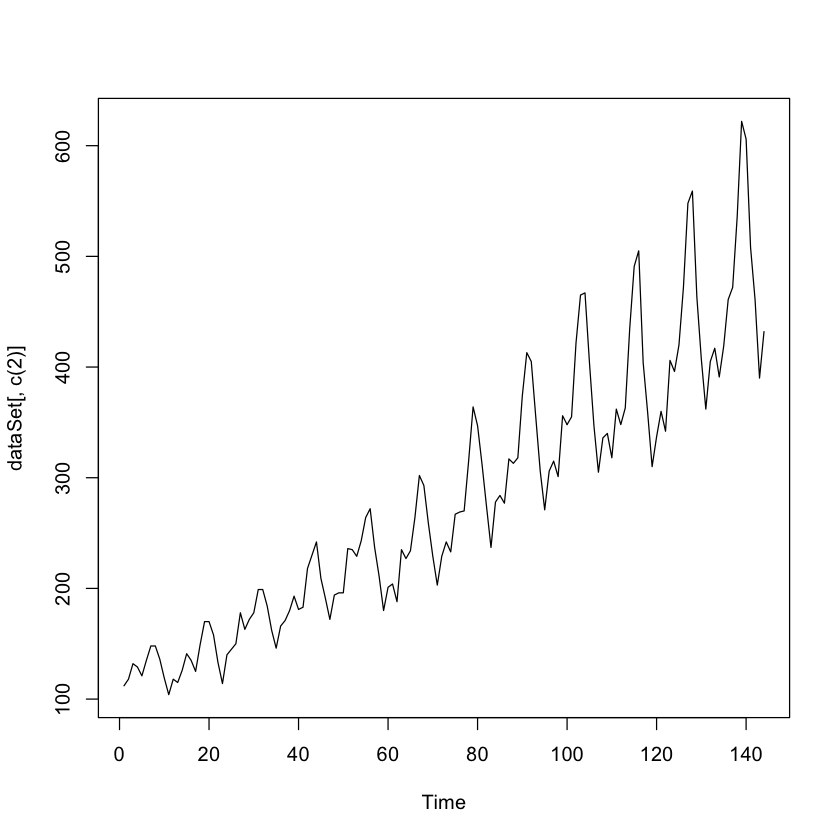

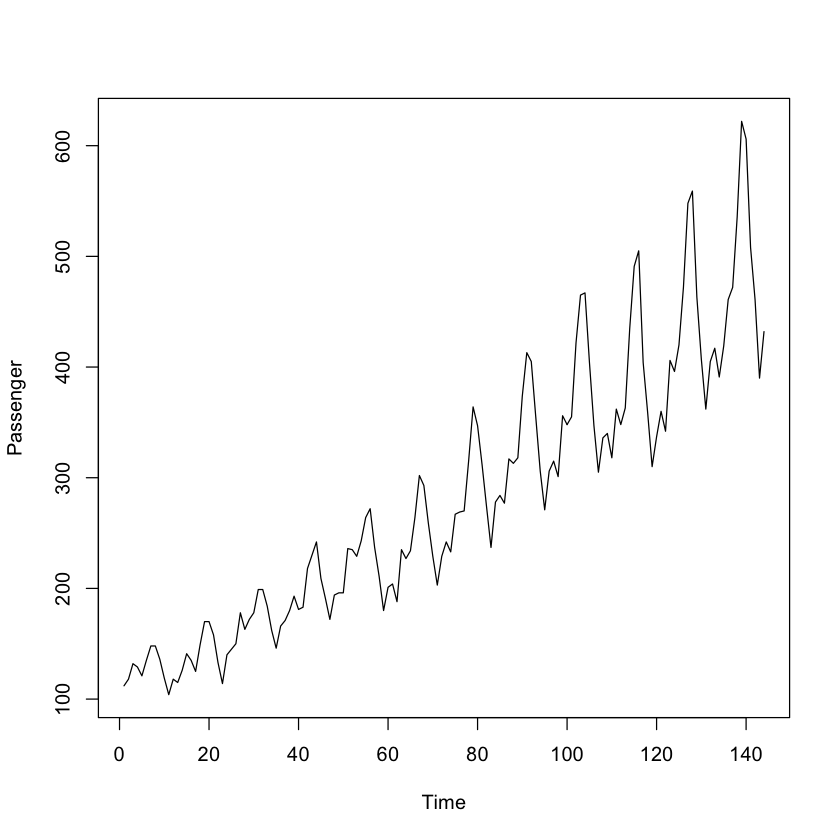

In [14]:
# Print top 10 rows in the dataSet
head(dataSet, 10)
# Print last 10 rows in the dataSet
tail(dataSet, 10)
# Dimention of Dataset
dim(dataSet)
# Check Data types of each column
table(unlist(lapply(dataSet, class)))

plot.ts(dataSet[, c(2)])
plot.ts(dataSet["Passenger"])

In [15]:
# Covert the dataset to a vactor i.e. creating "y" variable
dataSet  <- as.numeric(dataSet[, c("Passenger")])

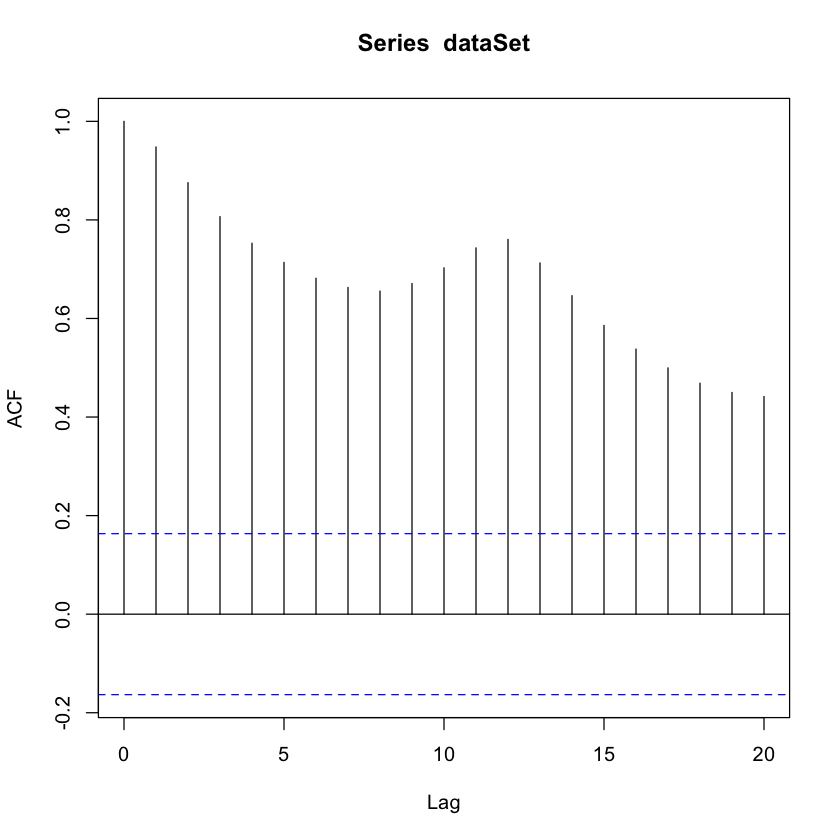

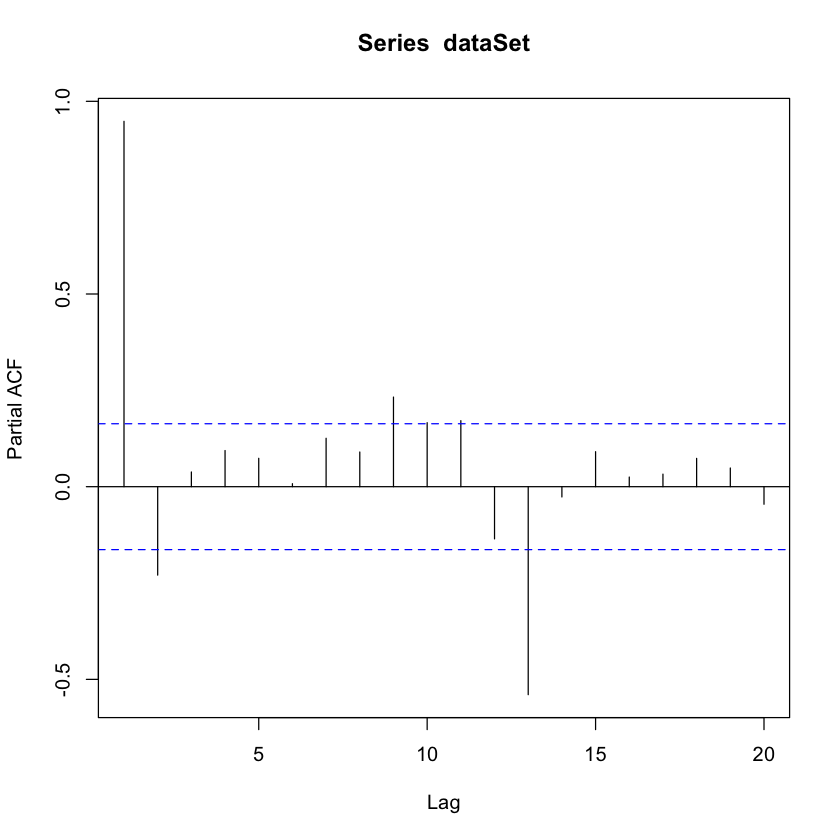

In [16]:
# Finding Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using ACF()
acf(dataSet, lag.max=20)   

# Finding Partial Auto-correlation in the series for selecting a Candidate ARIMA model 
# Using PACF()
pacf(dataSet, lag.max=20)  


	Ljung-Box test

data:  Residuals from ARIMA(1,1,2)
Q* = 36.237, df = 7, p-value = 6.538e-06

Model df: 3.   Total lags used: 10

[1] 0.9405837


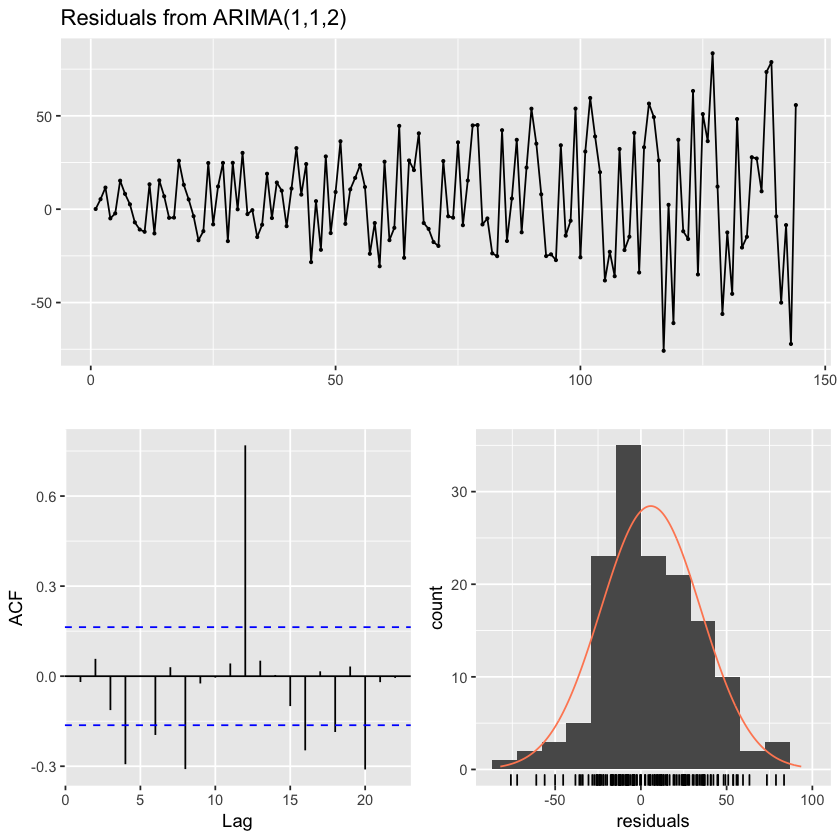

    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
145       475.2532 437.0378 513.4686 416.8078 533.6986
146       471.6985 410.2310 533.1660 377.6921 565.7049
147       469.6637 399.2138 540.1136 361.9199 577.4075
148       468.4989 393.2057 543.7922 353.3478 583.6500
149       467.8322 389.3703 546.2941 347.8350 587.8293
150       467.4505 386.6020 548.2991 343.8034 591.0977
151       467.2321 384.3984 550.0657 340.5489 593.9152
152       467.1070 382.5100 551.7040 337.7270 596.4870
153       467.0354 380.8058 553.2650 335.1586 598.9122
154       466.9944 379.2147 554.7741 332.7470 601.2419
155       466.9710 377.6970 556.2449 330.4383 603.5037
156       466.9575 376.2301 557.6850 328.2020 605.7131
157       466.9499 374.8010 559.0987 326.0203 607.8794
158       466.9455 373.4018 560.4891 323.8828 610.0081
159       466.9429 372.0279 561.8579 321.7830 612.1029
160       466.9415 370.6763 563.2067 319.7165 614.1665
161       466.9407 369.3448 564.5365 317.6807 616.2007
162       

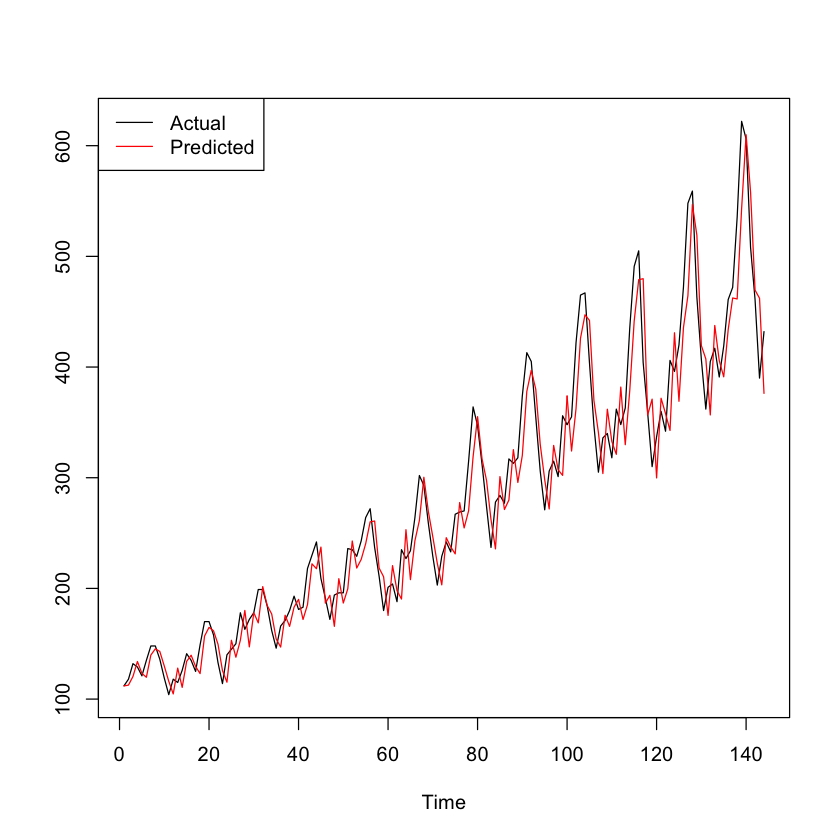

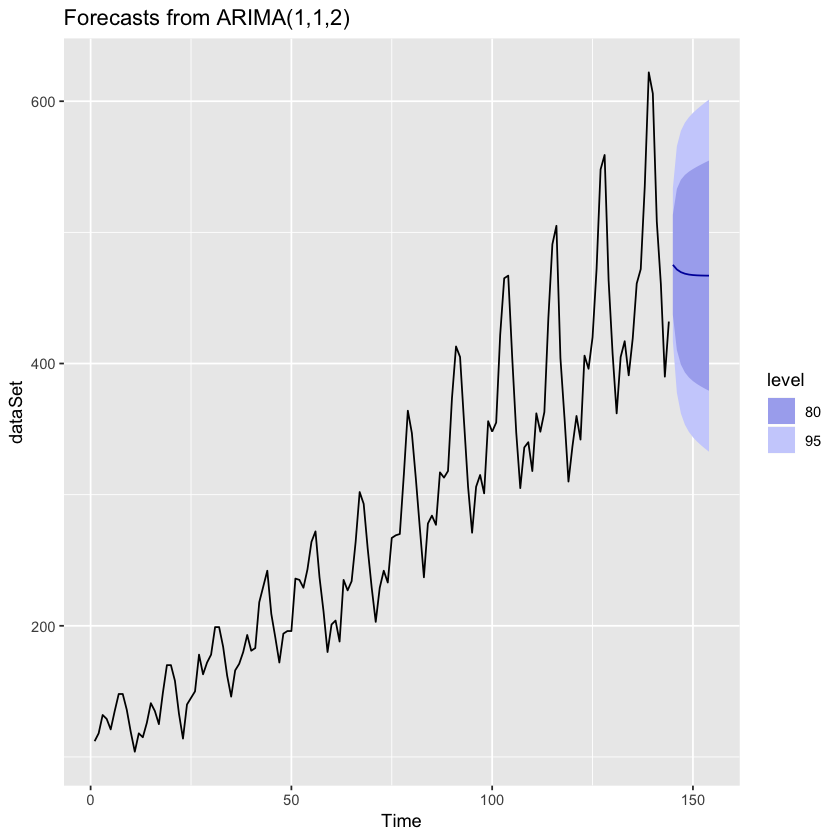

In [17]:
# ARIMA Model 
fit_arima  <- arima(dataSet,  order = c(1,1,2)); checkresiduals(fit_arima) 

# Calculate R squared value : r2
r2 <- cor(fitted(fit_arima),  dataSet)^2;  print(r2)

x <- dataSet            # actual
y <- fitted(fit_arima)  # predicted
# plot actual vs predicted
ts.plot(x, y, 
        gpars = list(col = c("black", "red")))
legend("topleft", legend = c("Actual", "Predicted"), col = c("black", "red"), lty = 1)

# Plotting Observed and Predicted with CI
forecast <- forecast:::forecast.Arima(fit_arima, h = 25)
print(forecast); autoplot(forecast(fit_arima))